<a href="https://colab.research.google.com/github/sanjramku/AI_Guild_Task2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#final fiixes

!pip install numpy==1.25.2 scipy==1.11.4 --force-reinstall

  Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached numpy-1.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, 

In [1]:
# ✅ Reproducibility Setup
import os
import random
import numpy as np
import torch

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"[INFO] Reproducibility seed set to {seed}")

set_seed(42)

# ✅ Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

# ✅ Path Setup (Colab-compatible)
base_dir = os.environ.get('PROJECT_ROOT', '/content')  # fallback to Colab root
data_dir = os.path.join(base_dir, 'mvtec_dataset')
print(f"[INFO] Data directory set to: {data_dir}")


[INFO] Reproducibility seed set to 42
[INFO] Using device: cpu
[INFO] Data directory set to: /content/mvtec_dataset


In [2]:
# ✅ Install compatible versions of NumPy, PyTorch, torchvision, torchaudio
!pip install numpy==1.24.4
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
arviz 0.22.0 requires numpy>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.6.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_v

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/2.3 GB 63.2 MB/s eta 0:00:35
ERROR: Operation cancelled by user
^C


In [1]:
# ----------------------------------------
# ✅ Mount Drive, Unzip Dataset, Set Paths (Fixed)
# ----------------------------------------
import os
import zipfile
from google.colab import drive

# ✅ Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# ✅ Set root directory in Drive
DATASET_ROOT = "/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets"

# ✅ Define ZIP paths
train_zip = os.path.join(DATASET_ROOT, "Copy of train_images.zip")
test_zip  = os.path.join(DATASET_ROOT, "Copy of test_images.zip")

# ✅ Define where to unzip
train_extract_to = os.path.join(DATASET_ROOT, "train_images")
test_extract_to  = os.path.join(DATASET_ROOT, "test_images")

# ✅ Unzip helper
def safe_unzip(zip_path, extract_to):
    if not os.path.exists(extract_to):
        print(f"📦 Unzipping {os.path.basename(zip_path)} → {extract_to}")
        os.makedirs(extract_to, exist_ok=True)
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_to)
            print("✅ Done.")
        except zipfile.BadZipFile:
            print(f"❌ Bad ZIP file: {zip_path}")
    else:
        print(f"✅ Already unzipped: {extract_to}")

# ✅ Perform extraction
safe_unzip(train_zip, train_extract_to)
safe_unzip(test_zip, test_extract_to)

# ✅ Set final image folders (inside unzipped folder)
train_path = os.path.join(train_extract_to, "train_images")
test_path  = os.path.join(test_extract_to, "test_images")

# ✅ Confirm contents
try:
    print("\n📁 Sample train images:", os.listdir(train_path)[:5])
    print("📁 Sample test images:", os.listdir(test_path)[:5])
except Exception as e:
    print(f"⚠️ Could not list dataset contents: {e}")


Mounted at /content/drive
✅ Already unzipped: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/train_images
✅ Already unzipped: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images

📁 Sample train images: ['000.png', '001.png', '002.png', '003.png', '004.png']
📁 Sample test images: ['bl_000.png', 'bl_001.png', 'bl_002.png', 'bl_003.png', 'bl_004.png']


In [2]:
from pathlib import Path
print("✅ # Train Images:", len(list(Path(train_path).glob("*.*"))))
print("✅ # Test Images:", len(list(Path(test_path).glob("*.*"))))


✅ # Train Images: 213
✅ # Test Images: 100


In [3]:
import os
import zipfile
from PIL import Image
from google.colab import drive

def setup_dataset():
    # ✅ Mount Google Drive
    if not os.path.exists("/content/drive/MyDrive"):
        print("🔄 Mounting Google Drive...")
        drive.mount('/content/drive')

    # ✅ Base directory on Drive
    base_dir = "/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets"

    # ✅ Paths to zip files
    train_zip = os.path.join(base_dir, "Copy of train_images.zip")
    test_zip  = os.path.join(base_dir, "Copy of test_images.zip")

    # ✅ Expected unzip output folders
    train_folder = os.path.join(base_dir, "train_images", "train_images")  # contains images
    test_folder  = os.path.join(base_dir, "test_images", "test_images")

    # ✅ Unzip to base_dir only if not already extracted
    def safe_unzip(zip_path, expected_subfolder):
        parent_folder = os.path.dirname(expected_subfolder)
        if not os.path.exists(expected_subfolder):  # check actual image folder
            print(f"📦 Unzipping {os.path.basename(zip_path)} → {parent_folder}")
            try:
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(parent_folder)
                print("✅ Unzipped successfully.")
            except zipfile.BadZipFile:
                print(f"❌ Corrupt zip file: {zip_path}")
        else:
            print(f"✅ Already unzipped: {expected_subfolder}")

    safe_unzip(train_zip, train_folder)
    safe_unzip(test_zip, test_folder)

    # ✅ Validate image files
    def check_images(folder):
        valid, broken = 0, []
        if not os.path.exists(folder):
            print(f"❌ Folder not found: {folder}")
            return 0, []
        for f in sorted(os.listdir(folder)):
            path = os.path.join(folder, f)
            if not f.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            try:
                with Image.open(path) as img:
                    img.convert("L")  # check readability as grayscale
                valid += 1
            except Exception:
                broken.append(f)
        return valid, broken

    print("\n🔍 Checking training images...")
    train_valid, train_broken = check_images(train_folder)
    print(f"✅ Usable train images: {train_valid}")
    if train_broken:
        print(f"⚠️ Corrupt: {train_broken[:5]}")

    print("\n🔍 Checking test images...")
    test_valid, test_broken = check_images(test_folder)
    print(f"✅ Usable test images: {test_valid}")
    if test_broken:
        print(f"⚠️ Corrupt: {test_broken[:5]}")

    return {
        "train_path": train_folder,
        "test_path": test_folder,
        "train_valid": train_valid,
        "test_valid": test_valid,
        "train_broken": train_broken,
        "test_broken": test_broken
    }


In [4]:
dataset_info = setup_dataset()
train_path = dataset_info["train_path"]
test_path  = dataset_info["test_path"]


✅ Already unzipped: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/train_images/train_images
✅ Already unzipped: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images/test_images

🔍 Checking training images...
✅ Usable train images: 213

🔍 Checking test images...
✅ Usable test images: 100


✅ Final usable images: 213
✅ Loaded 213 training images from: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/train_images/train_images


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


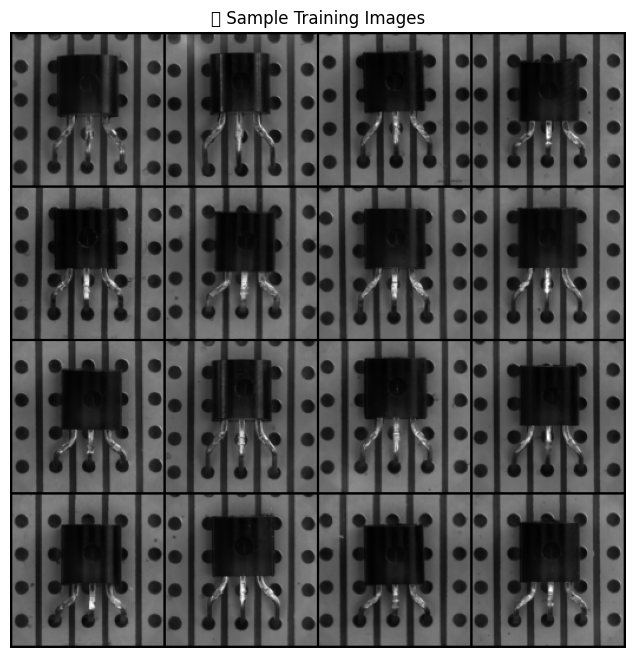

In [5]:
# ----------------------------------------
# ✅ Dataset Class + Transforms + Visualization
# ----------------------------------------
import os

# ✅ Define a portable base directory
base_dir = os.environ.get('PROJECT_ROOT', '/content')


# ✅ Correct training and test paths
train_path = os.path.join(base_dir, 'drive', 'MyDrive', 'Coding_College', 'AI_Guild', 'Task_2', 'Datasets', 'train_images', 'train_images')
test_path  = os.path.join(base_dir, 'drive', 'MyDrive', 'Coding_College', 'AI_Guild', 'Task_2', 'Datasets', 'test_images', 'test_images')

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import torchvision

# ✅ Custom dataset for grayscale anomaly images
from PIL import Image, UnidentifiedImageError

class AnomalyDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.transform = transform
        self.image_paths = []

        # ✅ Only include valid image paths
        for fname in sorted(os.listdir(folder_path)):
            path = os.path.join(folder_path, fname)
            if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue
            try:
                # Try opening image just once (no decoding)
                with Image.open(path) as img:
                    img.verify()
                self.image_paths.append(path)
            except Exception:
                print(f"⚠️ Skipping corrupt or unreadable image: {path}")

        print(f"✅ Final usable images: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")
        if self.transform:
            image = self.transform(image)
        return image


# ✅ Image Transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),  # Converts to [C x H x W] with values in [0,1]
])

# ✅ Load dataset
train_dataset = AnomalyDataset(train_path, transform=transform)
print(f"✅ Loaded {len(train_dataset)} training images from: {train_path}")

# ✅ Only create DataLoader if dataset is not empty
if len(train_dataset) > 0:
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)

    # ✅ Visualize a batch of grayscale images
    batch = next(iter(train_loader))
    grid = torchvision.utils.make_grid(batch, nrow=4, normalize=True)

    plt.figure(figsize=(8, 8))
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("🖼️ Sample Training Images")
    plt.show()
else:
    print("❌ No training data found — please check your train_path and image files.")


In [6]:
# ----------------------------------------
# ✅ Core Imports (Model, Training, Evaluation)
# ----------------------------------------

import os
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torchvision.transforms.functional as TF  # if you're using random crop/flip later

# ✅ Device already set earlier — avoid redefining
print(f"[INFO] Torch: {torch.__version__}, CUDA available: {torch.cuda.is_available()}")


[INFO] Torch: 2.6.0+cu124, CUDA available: False


In [7]:
# ----------------------------------------
# ✅ Dataset Class & DataLoaders (256x256)
# ----------------------------------------

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# Reuse AnomalyDataset (was already defined earlier)
class AnomalyDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.image_paths = sorted([
            os.path.join(folder_path, f)
            for f in os.listdir(folder_path)
            if f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")
        if self.transform:
            image = self.transform(image)
        return image

# ✅ Transform for 256×256 grayscale
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ✅ Use previously defined paths (portable!)
# - train_path and test_path should be set from unzip step
# - Make sure to replace hardcoded paths
train_dataset = AnomalyDataset(train_path, transform=transform)
test_dataset = AnomalyDataset(test_path, transform=transform)

# ✅ Use smaller batch size for higher resolution images
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=2)

print(f"✅ Loaded {len(train_dataset)} training and {len(test_dataset)} test images at 256x256 resolution.")


✅ Loaded 213 training and 100 test images at 256x256 resolution.


In [8]:
class FSVAE_MultiScale(nn.Module):
    def __init__(self, latent_dim=128):
        super(FSVAE_MultiScale, self).__init__()
        self.encoder = nn.ModuleList([
            nn.Sequential(nn.Conv2d(1, 32, 4, 2, 1), nn.ReLU()),   # 256→128
            nn.Sequential(nn.Conv2d(32, 64, 4, 2, 1), nn.ReLU()),  # 128→64
            nn.Sequential(nn.Conv2d(64, 128, 4, 2, 1), nn.ReLU()), # 64→32
            nn.Sequential(nn.Conv2d(128, 256, 4, 2, 1), nn.ReLU()) # 32→16
        ])
        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(256 * 16 * 16, latent_dim)
        self.fc_logvar = nn.Linear(256 * 16 * 16, latent_dim)

        self.decoder_input = nn.Linear(latent_dim, 256 * 16 * 16)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 4, 2, 1),
            nn.Sigmoid()
        )

    def encode(self, x):
        feats = []
        for layer in self.encoder:
            x = layer(x)
            feats.append(x)
        flat = self.flatten(x)
        mu = self.fc_mu(flat)
        logvar = self.fc_logvar(flat)
        return mu, logvar, feats

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        x = self.decoder_input(z).view(-1, 256, 16, 16)
        return self.decoder(x)

    def forward(self, x):
        mu, logvar, feats_orig = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        _, _, feats_recon = self.encode(x_recon)
        return x_recon, mu, logvar, feats_orig, feats_recon


In [9]:
# -----------------------------
# ✅ Grayscale Image Dataset (returns image + filename for scoring)
# -----------------------------

import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader

class GrayscaleImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_paths = [
            os.path.join(image_dir, fname)
            for fname in sorted(os.listdir(image_dir))
            if fname.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
        ]
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        path = self.image_paths[idx]
        image = Image.open(path).convert("L")
        if self.transform:
            image = self.transform(image)
        filename = os.path.basename(path)
        return image, filename

# -----------------------------
# ✅ Inference Setup
# -----------------------------

# Define inference path (this should point to your test images folder)
inference_dir = test_path  # ✅ Already defined in your notebook earlier

# GT masks — optional (not used during .tiff generation but can help with evaluation)
gt_mask_dir = os.path.join(base_dir, 'data', 'gt_masks')  # Adjust as needed

# Build dataset and dataloader
inference_dataset = GrayscaleImageDataset(image_dir=inference_dir, transform=transform)
inference_loader  = DataLoader(inference_dataset, batch_size=8, shuffle=False, num_workers=2)

print(f"✅ Loaded {len(inference_dataset)} unlabeled grayscale images for inference from: {inference_dir}")


✅ Loaded 100 unlabeled grayscale images for inference from: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images/test_images


In [10]:
# -----------------------------
# ✅ Train the FSVAE_MultiScale Model
# -----------------------------

from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

# ✅ Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ✅ Custom Dataset for grayscale 256×256 images
class GrayscaleDataset(Dataset):
    def __init__(self, root_dir):
        self.image_paths = [
            os.path.join(root_dir, fname)
            for fname in sorted(os.listdir(root_dir))
            if fname.lower().endswith(('.png', '.jpg', '.jpeg'))
        ]
        self.transform = transforms.Compose([
            transforms.Grayscale(),              # just in case
            transforms.Resize((256, 256)),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx])
        return self.transform(image)

# ✅ Path to 'good' training images
train_dir = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/train_images/train_images'

# ✅ Load dataset and dataloader
train_dataset = GrayscaleDataset(train_dir)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)

# ✅ Import and initialize FSVAE_MultiScale model
model = FSVAE_MultiScale(latent_dim=128).to(device)

# ✅ Loss & Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
l1_loss = torch.nn.L1Loss()

def kl_divergence(mu, logvar):
    return -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

# ✅ Training Loop
epochs = 20
model.train()
print(f"📦 Training on {len(train_dataset)} images for {epochs} epochs...\n")

for epoch in range(epochs):
    total_loss = 0
    recon_total = 0
    kl_total = 0

    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        batch = batch.to(device)

        optimizer.zero_grad()
        x_recon, mu, logvar, _, _ = model(batch)

        # ✅ Losses
        recon_loss = l1_loss(x_recon, batch)
        kl_loss = kl_divergence(mu, logvar) / batch.size(0)
        loss = recon_loss + 1e-4 * kl_loss  # Small KL weight

        loss.backward()
        optimizer.step()

        # ✅ Logging
        total_loss += loss.item()
        recon_total += recon_loss.item()
        kl_total += kl_loss.item()

    avg_loss = total_loss / len(train_loader)
    avg_recon = recon_total / len(train_loader)
    avg_kl = kl_total / len(train_loader)

    print(f"📉 Epoch [{epoch+1}/{epochs}] | Loss: {avg_loss:.4f} | Recon: {avg_recon:.4f} | KL: {avg_kl:.4f}")

# ✅ Save Model
os.makedirs("checkpoints", exist_ok=True)
torch.save(model.state_dict(), "checkpoints/fsvae_multiscale_bottle.pth")
print("✅ Model saved to checkpoints/fsvae_multiscale_bottle.pth")


📦 Training on 213 images for 20 epochs...



Epoch 1/20: 100%|██████████| 27/27 [00:50<00:00,  1.87s/it]


📉 Epoch [1/20] | Loss: 0.1566 | Recon: 0.1558 | KL: 8.0430


Epoch 2/20: 100%|██████████| 27/27 [00:48<00:00,  1.80s/it]


📉 Epoch [2/20] | Loss: 0.1118 | Recon: 0.1069 | KL: 49.1476


Epoch 3/20: 100%|██████████| 27/27 [00:49<00:00,  1.83s/it]


📉 Epoch [3/20] | Loss: 0.0751 | Recon: 0.0721 | KL: 29.5636


Epoch 4/20: 100%|██████████| 27/27 [00:48<00:00,  1.78s/it]


📉 Epoch [4/20] | Loss: 0.0655 | Recon: 0.0625 | KL: 29.7556


Epoch 5/20: 100%|██████████| 27/27 [00:53<00:00,  2.00s/it]


📉 Epoch [5/20] | Loss: 0.0635 | Recon: 0.0608 | KL: 27.2192


Epoch 6/20: 100%|██████████| 27/27 [00:50<00:00,  1.87s/it]


📉 Epoch [6/20] | Loss: 0.0617 | Recon: 0.0590 | KL: 26.9342


Epoch 7/20: 100%|██████████| 27/27 [00:48<00:00,  1.81s/it]


📉 Epoch [7/20] | Loss: 0.0606 | Recon: 0.0580 | KL: 25.9673


Epoch 8/20: 100%|██████████| 27/27 [00:50<00:00,  1.86s/it]


📉 Epoch [8/20] | Loss: 0.0604 | Recon: 0.0577 | KL: 26.5443


Epoch 9/20: 100%|██████████| 27/27 [00:48<00:00,  1.78s/it]


📉 Epoch [9/20] | Loss: 0.0595 | Recon: 0.0569 | KL: 25.8729


Epoch 10/20: 100%|██████████| 27/27 [00:48<00:00,  1.81s/it]


📉 Epoch [10/20] | Loss: 0.0589 | Recon: 0.0562 | KL: 26.7199


Epoch 11/20: 100%|██████████| 27/27 [00:49<00:00,  1.82s/it]


📉 Epoch [11/20] | Loss: 0.0583 | Recon: 0.0556 | KL: 26.9824


Epoch 12/20: 100%|██████████| 27/27 [00:48<00:00,  1.81s/it]


📉 Epoch [12/20] | Loss: 0.0579 | Recon: 0.0553 | KL: 25.1563


Epoch 13/20: 100%|██████████| 27/27 [00:50<00:00,  1.87s/it]


📉 Epoch [13/20] | Loss: 0.0573 | Recon: 0.0548 | KL: 24.9471


Epoch 14/20: 100%|██████████| 27/27 [00:48<00:00,  1.80s/it]


📉 Epoch [14/20] | Loss: 0.0562 | Recon: 0.0535 | KL: 26.1548


Epoch 15/20: 100%|██████████| 27/27 [00:48<00:00,  1.79s/it]


📉 Epoch [15/20] | Loss: 0.0555 | Recon: 0.0527 | KL: 27.6544


Epoch 16/20: 100%|██████████| 27/27 [00:49<00:00,  1.85s/it]


📉 Epoch [16/20] | Loss: 0.0547 | Recon: 0.0518 | KL: 28.9374


Epoch 17/20: 100%|██████████| 27/27 [00:55<00:00,  2.05s/it]


📉 Epoch [17/20] | Loss: 0.0518 | Recon: 0.0484 | KL: 34.2590


Epoch 18/20: 100%|██████████| 27/27 [00:50<00:00,  1.86s/it]


📉 Epoch [18/20] | Loss: 0.0504 | Recon: 0.0471 | KL: 32.4137


Epoch 19/20: 100%|██████████| 27/27 [00:49<00:00,  1.82s/it]


📉 Epoch [19/20] | Loss: 0.0492 | Recon: 0.0457 | KL: 35.0019


Epoch 20/20: 100%|██████████| 27/27 [00:50<00:00,  1.86s/it]


📉 Epoch [20/20] | Loss: 0.0477 | Recon: 0.0439 | KL: 38.1710
✅ Model saved to checkpoints/fsvae_multiscale_bottle.pth


In [11]:
# -----------------------------
# ✅ Generate .tiff maps using multi-scale feature error + pixel recon error + smoothing
# -----------------------------

import os
import torch
import torch.nn.functional as F
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import torchvision.transforms as transforms
import tifffile
from scipy.ndimage import gaussian_filter

# ✅ Paths
TEST_IMAGES = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images'
OUTPUT_TIFFS = '/content/mvtec_eval_ready_maps/bottle/test'
os.makedirs(OUTPUT_TIFFS, exist_ok=True)

# ✅ Folder mapping for 'bottle'
FOLDER_NAME_MAPPING = {
    "bl": "broken_large",
    "cl": "broken_small",
    "dc": "contamination",
    "gd": "good",
    "mp": "other"  # Keep only if relevant
}

# ✅ Preprocessing
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# ✅ Set model to eval
model.eval()
alpha = 0.6  # weighting for feature vs pixel error (adjustable)

print("🧪 Generating .tiff maps:")
count = 0

for fname in tqdm(sorted(os.listdir(TEST_IMAGES))):
    if not fname.endswith('.png'):
        continue

    fpath = os.path.join(TEST_IMAGES, fname)
    image = Image.open(fpath).convert("L")
    img_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        # Forward pass through model
        recon_img, _, _, feats_orig, feats_recon = model(img_tensor)

        # ✅ Pixel-wise L1 error map
        pixel_error = F.l1_loss(recon_img, img_tensor, reduction='none')  # shape: (1, 1, H, W)
        pixel_error = pixel_error.squeeze().cpu().numpy()

        # ✅ Multi-scale feature difference
        feat_error = torch.zeros((1, 1, 256, 256)).to(device)
        for f1, f2 in zip(feats_orig, feats_recon):
            err = torch.norm(f1 - f2, p=2, dim=1, keepdim=True)  # (1, 1, H, W)
            err_resized = F.interpolate(err, size=(256, 256), mode='bilinear', align_corners=False)
            feat_error += err_resized

        feat_error = feat_error.squeeze().cpu().numpy()
        feat_error /= len(feats_orig)

        # ✅ Weighted fusion
        alpha = 0.3  # Lower weight to pixel error (30%), more focus on feature diff


        # ✅ Gaussian smoothing
        total_error = gaussian_filter(total_error, sigma=4)

        # ✅ Percentile clipping
        p1, p99 = np.percentile(total_error, (1, 99))
        total_error = np.clip(total_error, p1, p99)
        total_error -= total_error.min()
        if total_error.max() > 0:
            total_error /= total_error.max()

        # ✅ Resize to 1024x1024
        error_map = cv2.resize(total_error, (1024, 1024), interpolation=cv2.INTER_LINEAR)

    try:
        short_code = fname.split('_')[0]
        mapped_folder = FOLDER_NAME_MAPPING.get(short_code)
        if mapped_folder is None:
            print(f"⚠️ Skipping unknown defect type: {short_code}")
            continue

        defect_dir = os.path.join(OUTPUT_TIFFS, mapped_folder)
        os.makedirs(defect_dir, exist_ok=True)

        save_path = os.path.join(defect_dir, fname.replace('.png', '.tiff'))
        tifffile.imwrite(save_path, error_map.astype(np.float32))
        count += 1
    except Exception as e:
        print(f"❌ Failed for {fname}: {e}")

print(f"✅ Saved {count} .tiff anomaly maps to: {OUTPUT_TIFFS}")


🧪 Generating .tiff maps:


100%|██████████| 1/1 [00:00<00:00, 11491.24it/s]

✅ Saved 0 .tiff anomaly maps to: /content/mvtec_eval_ready_maps/bottle/test


In [12]:
import os

test_image_dir = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images'

# ✅ Check directory existence
print("📁 Directory Exists:", os.path.exists(test_image_dir))

# ✅ Recursively find all .png images
all_images = []
for root, _, files in os.walk(test_image_dir):
    for file in files:
        if file.endswith('.png'):
            full_path = os.path.join(root, file)
            rel_path = os.path.relpath(full_path, test_image_dir)
            all_images.append(rel_path)

# ✅ Summary
print(f"📸 Found {len(all_images)} .png images in: {test_image_dir}")
print("📝 First 5 files:", all_images[:5])


📁 Directory Exists: True
📸 Found 100 .png images in: /content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images
📝 First 5 files: ['test_images/bl_000.png', 'test_images/bl_001.png', 'test_images/bl_002.png', 'test_images/bl_003.png', 'test_images/bl_004.png']


In [13]:
import torch.nn.functional as F


In [14]:
import os
import torch
import torch.nn.functional as F
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm
import torchvision.transforms as transforms
import tifffile

# --- Paths ---
TEST_IMAGES_ROOT = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets/test_images'
OUTPUT_TIFFS = '/content/mvtec_eval_ready_maps/bottle/test'
os.makedirs(OUTPUT_TIFFS, exist_ok=True)

# --- Transform ---
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

# --- Model in eval mode ---
model.eval()
model.to(device)

# --- Generation ---
print("🧪 Generating .tiff maps (by folder)...")
count = 0

for defect_type in sorted(os.listdir(TEST_IMAGES_ROOT)):
    defect_folder = os.path.join(TEST_IMAGES_ROOT, defect_type)
    if not os.path.isdir(defect_folder):
        continue

    save_dir = os.path.join(OUTPUT_TIFFS, defect_type)
    os.makedirs(save_dir, exist_ok=True)

    for fname in sorted(os.listdir(defect_folder)):
        if not fname.endswith('.png'):
            continue

        image_path = os.path.join(defect_folder, fname)
        image = Image.open(image_path).convert("L")
        img_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            recon, _, _, feats_orig, feats_recon = model(img_tensor)

            # ✅ Multi-scale feature error (mean of all scales)
            feat_error = torch.zeros((1, 1, 256, 256)).to(device)
            for f1, f2 in zip(feats_orig, feats_recon):
                diff = torch.norm(f1 - f2, p=2, dim=1, keepdim=True)
                diff_resized = F.interpolate(diff, size=(256, 256), mode='bilinear', align_corners=False)
                feat_error += diff_resized

            feat_error /= len(feats_orig)  # mean across scales
            error_map = feat_error.squeeze().cpu().numpy()

            # ✅ Normalize
            error_map -= error_map.min()
            if error_map.max() > 0:
                error_map /= error_map.max()

            # ✅ Resize to 1024×1024 for MVTec compatibility
            error_map = cv2.resize(error_map, (1024, 1024), interpolation=cv2.INTER_LINEAR)

        # ✅ Save to appropriate folder
        save_path = os.path.join(save_dir, fname.replace('.png', '.tiff'))
        tifffile.imwrite(save_path, error_map.astype(np.float32))
        count += 1

print(f"✅ Saved {count} .tiff anomaly maps into: {OUTPUT_TIFFS}")


🧪 Generating .tiff maps (by folder)...
✅ Saved 100 .tiff anomaly maps into: /content/mvtec_eval_ready_maps/bottle/test


In [15]:
# final_eval.py

import os
import shutil
import cv2
import sys
import torch
import torch.nn.functional as F
import tifffile
import subprocess
import numpy as np
from PIL import Image
from tqdm import tqdm
from torchvision import transforms

# -------------------------
# Configuration
# -------------------------
class config:
    DATASET_NAME = 'bottle'
    DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
    EVAL_ANOMALY_MAPS_DIR = '/content/mvtec_eval_ready_maps'
    DATA_DIR = '/content/mvtec_eval/dataset_format'
    EVAL_SCRIPTS_DIR = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/mvtec_ad_evaluation/mvtec_ad_evaluation'
    EVALUATION_RESULTS_DIR = '/content/evaluation_results'

# -------------------------
# Dataset Paths
# -------------------------
DRIVE_BASE = '/content/drive/MyDrive/Coding_College/AI_Guild/Task_2/Datasets'
TEMP_TRAIN = os.path.join(DRIVE_BASE, 'train_images')
TEMP_TEST = os.path.join(DRIVE_BASE, 'test_images', 'test_images')
TEMP_GT = os.path.join(DRIVE_BASE, 'ground_truth', 'gt_masks')

# -------------------------
# Mappings
# -------------------------
defect_map = {
    'gd': 'good',
    'dc': 'good',
    'bl': 'broken_large',
    'mp': 'broken_small',
    'cl': 'contamination'
}

# -------------------------
# Step 1: Generate .tiff anomaly maps
# -------------------------
output_base_dir = os.path.join(config.EVAL_ANOMALY_MAPS_DIR, config.DATASET_NAME, 'test')
os.makedirs(output_base_dir, exist_ok=True)

preprocess = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

print("🧪 Generating .tiff maps:")
model.eval()
count = 0

for fname in tqdm(sorted(os.listdir(TEMP_TEST))):
    if not fname.endswith('.png'):
        continue

    short_defect, image_id = fname.split('_', 1)
    defect_type = defect_map.get(short_defect, short_defect)
    output_subdir = os.path.join(output_base_dir, defect_type)
    os.makedirs(output_subdir, exist_ok=True)

    # Load image
    img_path = os.path.join(TEMP_TEST, fname)
    img = Image.open(img_path).convert("L")
    img_tensor = preprocess(img).unsqueeze(0).to(config.DEVICE)

    with torch.no_grad():
        recon_img, _, _, feats_orig, feats_recon = model(img_tensor)

        # Multi-scale feature error (average over levels)
        error_map = torch.zeros((1, 1, 256, 256)).to(config.DEVICE)
        for f1, f2 in zip(feats_orig, feats_recon):
            diff = torch.norm(f1 - f2, p=2, dim=1, keepdim=True)
            diff_resized = F.interpolate(diff, size=(256, 256), mode='bilinear', align_corners=False)
            error_map += diff_resized
        error_map /= len(feats_orig)
        error_map = error_map.squeeze().cpu().numpy()

        # Resize to 1024x1024 for MVTec eval
        error_map = cv2.resize(error_map, (1024, 1024), interpolation=cv2.INTER_LINEAR)

    # Save .tiff file
    tif_path = os.path.join(output_subdir, image_id.replace('.png', '.tiff'))
    tifffile.imwrite(tif_path, error_map.astype(np.float32))
    count += 1

print(f"✅ Saved {count} .tiff anomaly maps to: {output_base_dir}")

# -------------------------
# Step 2: Restructure to MVTec Format
# -------------------------
print("\n📦 Restructuring dataset format...")

train_dir = os.path.join(config.DATA_DIR, config.DATASET_NAME, 'train', 'good')
test_base = os.path.join(config.DATA_DIR, config.DATASET_NAME, 'test')
gt_base = os.path.join(config.DATA_DIR, config.DATASET_NAME, 'ground_truth')

# Clean if exists
for folder in [train_dir, test_base, gt_base]:
    if os.path.exists(folder):
        shutil.rmtree(folder)
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_base, exist_ok=True)
os.makedirs(gt_base, exist_ok=True)

# Copy training images
for fname in tqdm(sorted(os.listdir(TEMP_TRAIN)), desc="📥 Copying training images"):
    if fname.endswith('.png'):
        shutil.copy(os.path.join(TEMP_TRAIN, fname), os.path.join(train_dir, fname))

# Copy test images and GT masks
for fname in tqdm(sorted(os.listdir(TEMP_TEST)), desc="📥 Copying test + masks"):
    if not fname.endswith('.png'):
        continue
    short_defect, image_id = fname.split('_', 1)
    defect_type = defect_map.get(short_defect, short_defect)

    test_dir = os.path.join(test_base, defect_type)
    gt_dir = os.path.join(gt_base, defect_type)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(gt_dir, exist_ok=True)

    shutil.copy(os.path.join(TEMP_TEST, fname), os.path.join(test_dir, image_id))

    if defect_type != 'good':
        gt_src = os.path.join(TEMP_GT, fname)
        gt_dst = os.path.join(gt_dir, image_id.replace('.png', '_mask.png'))
        if os.path.exists(gt_src):
            shutil.copy(gt_src, gt_dst)
        else:
            print(f"⚠️ Missing GT mask for {fname}")

# -------------------------
# Step 3: Run MVTec Evaluation
# -------------------------
os.makedirs(config.EVALUATION_RESULTS_DIR, exist_ok=True)
print("\n🚀 Running MVTec Evaluation Script...")
try:
    result = subprocess.run([
        sys.executable,
        os.path.join(config.EVAL_SCRIPTS_DIR, 'evaluate_experiment.py'),
        '--anomaly_maps_dir', config.EVAL_ANOMALY_MAPS_DIR,
        '--dataset_base_dir', config.DATA_DIR,
        '--output_dir', config.EVALUATION_RESULTS_DIR,
        '--pro_integration_limit', '0.3',
        '--evaluated_objects', config.DATASET_NAME
    ], capture_output=True, text=True, check=True)
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("❌ Evaluation failed:\n", e.stderr)

# -------------------------
# Step 4: Print Metrics
# -------------------------
print("\n📊 Printing Metrics...")
try:
    result = subprocess.run([
        sys.executable,
        os.path.join(config.EVAL_SCRIPTS_DIR, 'print_metrics.py'),
        '--metrics_folder', config.EVALUATION_RESULTS_DIR
    ], capture_output=True, text=True, check=True)
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print("❌ Metrics printing failed:\n", e.stderr)


🧪 Generating .tiff maps:


100%|██████████| 100/100 [00:17<00:00,  5.88it/s]


✅ Saved 100 .tiff anomaly maps to: /content/mvtec_eval_ready_maps/bottle/test

📦 Restructuring dataset format...


📥 Copying test + masks: 100%|██████████| 100/100 [00:08<00:00, 11.78it/s]



🚀 Running MVTec Evaluation Script...
=== Evaluate bottle ===
Parsed 90 ground truth image files.
Read ground truth files and corresponding predictions...
Compute PRO curve...
Sort 94371840 anomaly scores...
AU-PRO (FPR limit: 0.3): 0.535222452560306
Image-level classification AU-ROC: 0.6083333333333333


Wrote metrics to /content/evaluation_results/metrics.json


📊 Printing Metrics...

AU PRO (localization)
╒═════════════════════════════════╤══════════╤═════════╤═══════════╤══════════╤════════╤════════════╤═══════════╤═════════════╤════════╤═════════╤════════╤══════════════╤══════════════╤════════╤══════════╤════════╕
│ Experiment                      │   bottle │ cable   │ capsule   │ carpet   │ grid   │ hazelnut   │ leather   │ metal_nut   │ pill   │ screw   │ tile   │ toothbrush   │ transistor   │ wood   │ zipper   │   Mean │
╞═════════════════════════════════╪══════════╪═════════╪═══════════╪══════════╪════════╪════════════╪═══════════╪═════════════╪════════╪═════════╪════════╪═══